In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torch.nn.functional

In [ ]:
img = cv2.imread('/home/rounak/Downloads/Tryptag_1.jpg')
# Display original image
img = np.array(img[2880:3840, :,:])
img=img[430:610, 370:600]
plt.figure(figsize=(20,5))
plt.imshow(img)

TypeError: ignored

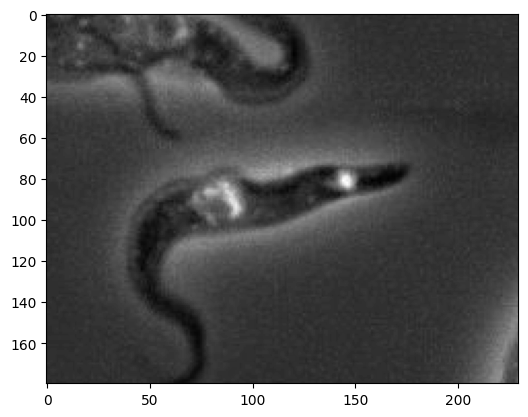

In [ ]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img_gray, cmap="gray")

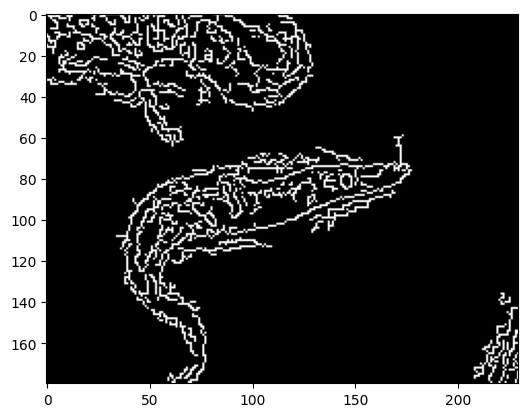

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image=img_gray, threshold1=20, threshold2=50) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.imshow(edges, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


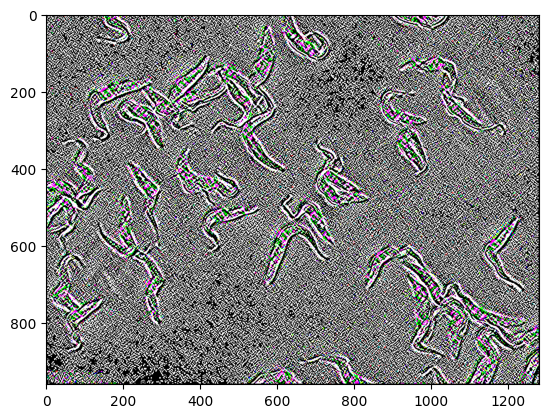

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
plt.imshow(sobelxy)

#cv2.imshow('Sobel Y', sobely)

#cv2.imshow('Sobel X Y using Sobel() function', sobelxy)





In [6]:
lst_of_img = []
for k in range(1,8):
    src = '/content/Tryptag_'+str(k)+'.jpg'
    img = cv2.imread(src)
    img = np.array(img[2880:3840, :,:])
    for i in range(5):
        for j in range(5):
            lst_of_img.append(img[i*192:(i+1)*192, j*256: (j+1)*256])
lst_of_img = np.array(lst_of_img)

(175, 192, 256, 3)

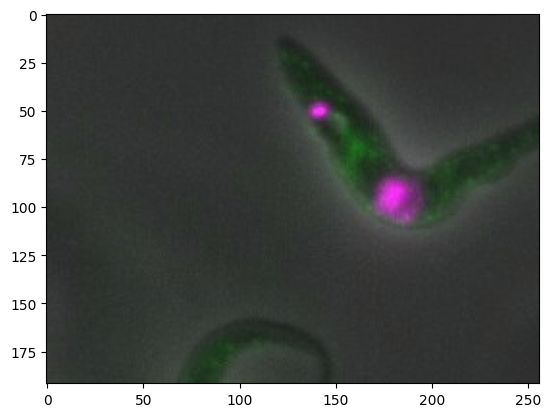

In [7]:
plt.imshow(lst_of_img[102])
lst_of_img.shape

In [8]:
def subsample(img, k):
    lst = []
    for i in range(0,img.shape[0]):
      x = img[i][::k, ::k]
      lst.append(x.T)
    return np.array(lst)

<ipython-input-9-b77ab7611be0>:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(img_interpolated[0].T)


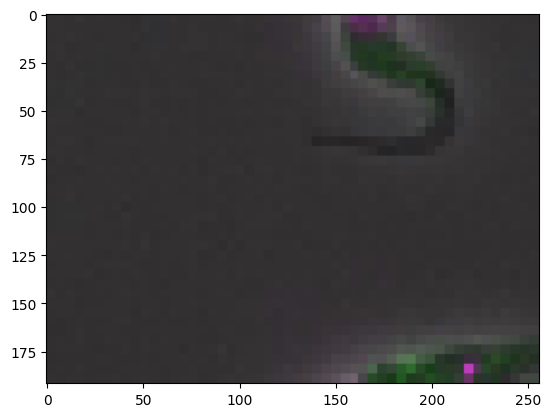

In [9]:
img = subsample(lst_of_img, 5)
img = torch.from_numpy(img)
img_interpolated = torch.nn.functional.interpolate(img,(256,192),mode='nearest-exact')
plt.imshow(img_interpolated[0].T)

#plt.imshow(lst_of_img[0])

In [10]:
lst_of_img_reduced = []
loss_lst = []
for i in range(1,10):
  loss_lst.append(0)
for k in range(1,10):
    lst_of_img_damn = subsample(lst_of_img, k)
    latest_img = torch.from_numpy(lst_of_img_damn)
    img_interpolated = torch.nn.functional.interpolate(latest_img,(256,192),mode='nearest-exact')
    for i in range(lst_of_img.shape[0]):
        img = lst_of_img[i]
        img_int = img_interpolated[i].T
        diff_img = np.array(img )- np.array(img_int)
        loss_lst[k-1]+=(np.linalg.norm(diff_img))

array([0.        , 7.34553243, 8.65088579, 9.12425032, 9.27376946,
       9.57485006, 9.59644671, 9.8898621 , 9.74103928])

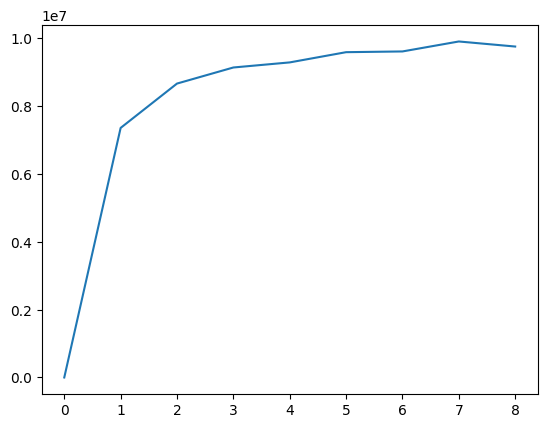

In [11]:
loss_lst = np.array(loss_lst)
plt.plot(loss_lst)
loss_lst/1e6